In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scanpy as sc 
import seaborn as sns 
import anndata as ad
from tqdm import tqdm
from scipy.spatial.distance import pdist, squareform
from scipy import stats

# Description 

This notebook is used to quantify the cell cluster difference between N and R two groups. We found the echolocation-specific cluster 1 is also the most different group between N and R.

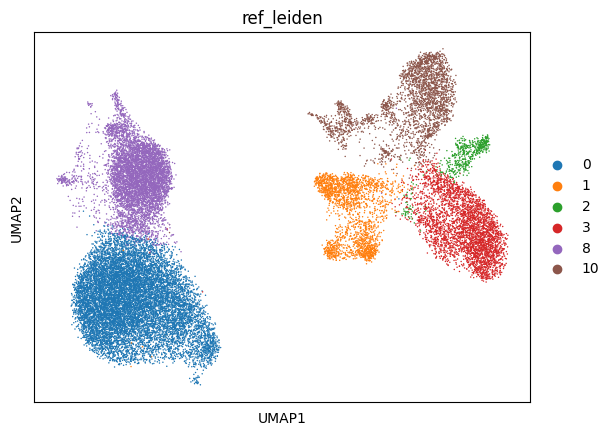

In [2]:
rna = sc.read_h5ad('/home/rsun@ZHANGroup.local/sly_data/sly_05_require/rna_label.h5ad')
sc.pl.umap(rna, color = 'ref_leiden')

## using consine distance to quantify the difference between two groups

In [32]:
def pipe(rna,K = 10, key=None):

    if key is None:
        sub_data = rna
    else:
        sub_data = rna[rna.obs.ref_leiden == key]

    #x1 = sub_data.obsm['X_pca_harmony'][sub_data.obs.state == 'n']
    #y2 = sub_data.obsm['X_pca_harmony'][sub_data.obs.state == 'r']  
    x1 = sub_data.obsm['X_pca'][sub_data.obs.state == 'n'][:,:K]
    y2 = sub_data.obsm['X_pca'][sub_data.obs.state == 'r'][:,:K]

    all_res = []

    for i in range(30):
        res = []
        for ele in [x1,y2]:
            n = ele.shape[0]
            #idx= np.random.choice(np.arange(n), size = 1000)
           # mean = ele[idx,:].mean(axis = 0)
            mean = ele.mean(axis = 0)
            res.append(mean)
        
        res = np.array(res)
        #pairwise_dist = pdist(res, metric='cosine')
        pairwise_dist = pdist(res,  metric='cosine')
        tmp = squareform(pairwise_dist)
        score = tmp[1,0]
        all_res.append(score)
    return all_res 


In [33]:
dist_dic = {}

for k in [5,10,15,20,25,30,35,40,45,50]:

    key_list = list(rna.obs.ref_leiden.unique())
    key_list.append(None)
                    

    res_dic = {}
    for key in key_list:
        res = pipe(rna, K = k, key = key)
        if key is None:
            res_dic['random'] = res
        else:
            res_dic[key] = res
        #break

    res_df = pd.DataFrame(res_dic)
    res_df = res_df.loc[:,['0','1','2','3','8','10','random']]
    tmp = res_df.mean(0)
    dist_dic[k] = tmp

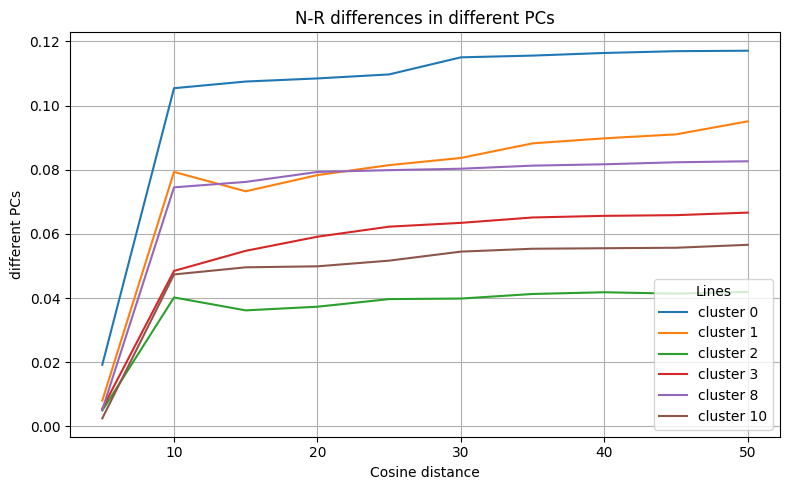

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(dist_dic).iloc[:-1,:]
# 创建绘图区域
plt.figure(figsize=(8, 5))

# 遍历每一行
for idx, row in df.iterrows():
    plt.plot(row.index, row.values, label=f'cluster {idx}')

# 添加图例、坐标轴标签等
plt.xlabel("Cosine distance")
plt.ylabel("different PCs")
plt.title("N-R differences in different PCs")
plt.legend(title='Lines')
plt.grid(True)

# 显示图像
plt.tight_layout()
plt.show()

In [35]:
df.to_csv('PCs_difference.csv', index = False)

In [ ]:
df = pd.read_csv('files/PCs_difference.csv')

,5,10,15,20,25,30,35,40,45,50
0,0.019226,0.105436,0.107513,0.108483,0.109734,0.115057,0.115599,0.116416,0.116978,0.117120
1,0.008050,0.079341,0.073298,0.078353,0.081456,0.083691,0.088243,0.089807,0.091049,0.095101
2,0.004947,0.040203,0.036181,0.037319,0.039694,0.039860,0.041290,0.041829,0.041389,0.041937
3,0.005567,0.048480,0.054742,0.059145,0.062274,0.063458,0.065137,0.065647,0.065862,0.066654
8,0.005185,0.074535,0.076222,0.079324,0.079894,0.080336,0.081298,0.081720,0.082347,0.082655
10,0.002525,0.047380,0.049601,0.049913,0.051683,0.054494,0.055388,0.055550,0.055701,0.056614


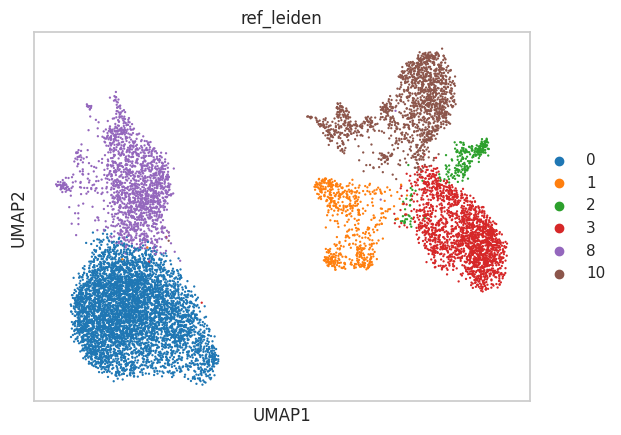

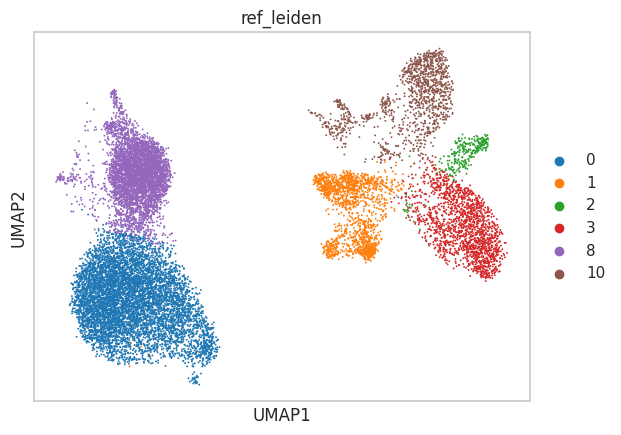

In [77]:
sc.pl.umap(rna[rna.obs.state == 'r',:], color = 'ref_leiden', save = 'R_rna_umap.pdf')
sc.pl.umap(rna[rna.obs.state == 'n',:], color = 'ref_leiden', save = 'N_rna_umap.pdf')

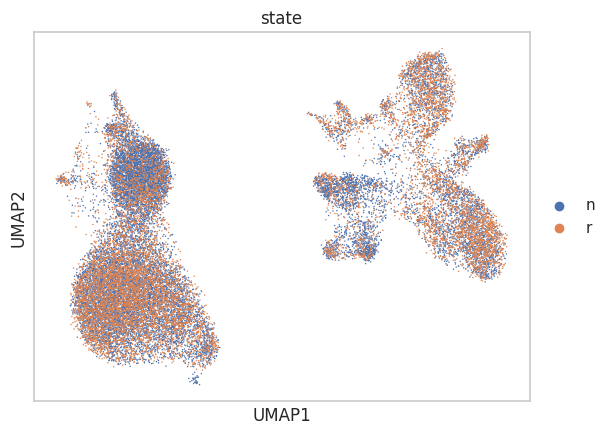

In [78]:
sc.pl.umap(rna, color = 'state', save = 'state_rna_umap.pdf')
